In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from wordcloud import WordCloud, STOPWORDS
import scipy.stats

##### Must include a write-up for what the data is, what it represents, and how it is being used in the analysis.

In [3]:
url = 'https://www.goodreads.com/list/show/1.Best_Books_Ever'
url2 = 'https://www.goodreads.com/list/show/1.Best_Books_Ever?page=2'
page = requests.get(url) 
page2 = requests.get(url2)
soup = bs(page.content, 'html.parser')
soup2 = bs(page2.content, 'html.parser')
titles = soup.find_all('a', class_='bookTitle')
titles2 = soup2.find_all('a', class_='bookTitle')
authors = soup.find_all('a', class_='authorName')
authors2 = soup2.find_all('a', class_='authorName')
info = soup.find_all('span', class_='minirating')
info2 = soup2.find_all('span', class_='minirating')



In [4]:
bookTitle = []
for ind in range(len(titles)):
    t = titles[ind]
    book = t.get_text()
    book = book.split(' (')[0]
    bookTitle.append((book.strip()))

    
bookAuthor = []
for ind in range(len(authors)):
    a = authors[ind]
    book = a.get_text()
    #book = book.split(' (')[0]
    bookAuthor.append((book))
    
bookRating = []
bookNumReviews = []
#bookPub = []
for ind in range(len(info)):
    s = info[ind].get_text()
    s.strip(' ')

    r = s.split('—')[0].strip()
    n = s.split('—')[1].strip()
    #pub = s.split('—')[2].strip()
    if (r.split(' ')[0] == 'really'):
        r = r.split(' ')[3]
    else:
        r = r.split(' ')[0]
    n = n.split(' ')[0]
    #pub = pub[-4:]
    bookRating.append(float(r))
    bookNumReviews.append(int(n.replace(',','')))
    #bookPub.append(int(pub))
  

In [5]:
for ind in range(len(titles2)):
    t = titles2[ind]
    book = t.get_text()
    book = book.split(' (')[0]
    bookTitle.append((book.strip()))


for ind in range(len(authors2)):
    a = authors2[ind]
    book = a.get_text()
    #book = book.split(' (')[0]
    bookAuthor.append((book))
    

for ind in range(len(info2)):
    s = info2[ind].get_text()
    s.strip(' ')

    r = s.split('—')[0].strip()
    n = s.split('—')[1].strip()
    #pub = s.split('—')[2].strip()
    if (r.split(' ')[0] == 'really'):
        r = r.split(' ')[3]
    else:
        r = r.split(' ')[0]
    n = n.split(' ')[0]

    bookRating.append(float(r))
    bookNumReviews.append(int(n.replace(',','')))

#### Include a write-up on how you cleaned the data and any issues in the data that you may have come across.

In [6]:
books = {
    "Title": bookTitle,
    "Author": bookAuthor,
    "Rating": bookRating,
    "Number of Reviews": bookNumReviews
    #"Publication": bookPub
}

book_df = pd.DataFrame(books)
book_df.to_csv(r'/Users/padmaprabagaran/Desktop/DAT 301/Final/books.csv')
book_df

,Title,Author,Rating,Number of Reviews
0,The Hunger Games,Suzanne Collins,4.32,7064350
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,2811230
2,To Kill a Mockingbird,Harper Lee,4.27,5031426
3,Pride and Prejudice,Jane Austen,4.27,3411893
4,Twilight,Stephenie Meyer,3.62,5497741
...,...,...,...,...
195,Murder on the Orient Express,Agatha Christie,4.18,461071
196,The Clan of the Cave Bear,Jean M. Auel,4.07,244388
197,The Canterbury Tales,Geoffrey Chaucer,3.52,203535
198,The World According to Garp,John Irving,4.09,212938


### Graphs
+15 points possible

- At least 1 graph in MatPlotLib and at least 1 graph in Seaborn.
- Graphs should be formatted with x- and y-axis labels, coloring, and titles.  The individual observations (such as rectangles of bar charts or wedges of pie charts) should include labels, where applicable.
- There should be a total of 3 unique graphs types.
- Include a write-up describing what data you are visualizing and any points of interest that stick out to you.  If it is not obvious, include a description of why you chose the specific visualization.


#### Which books have the highest rating in the dataset?

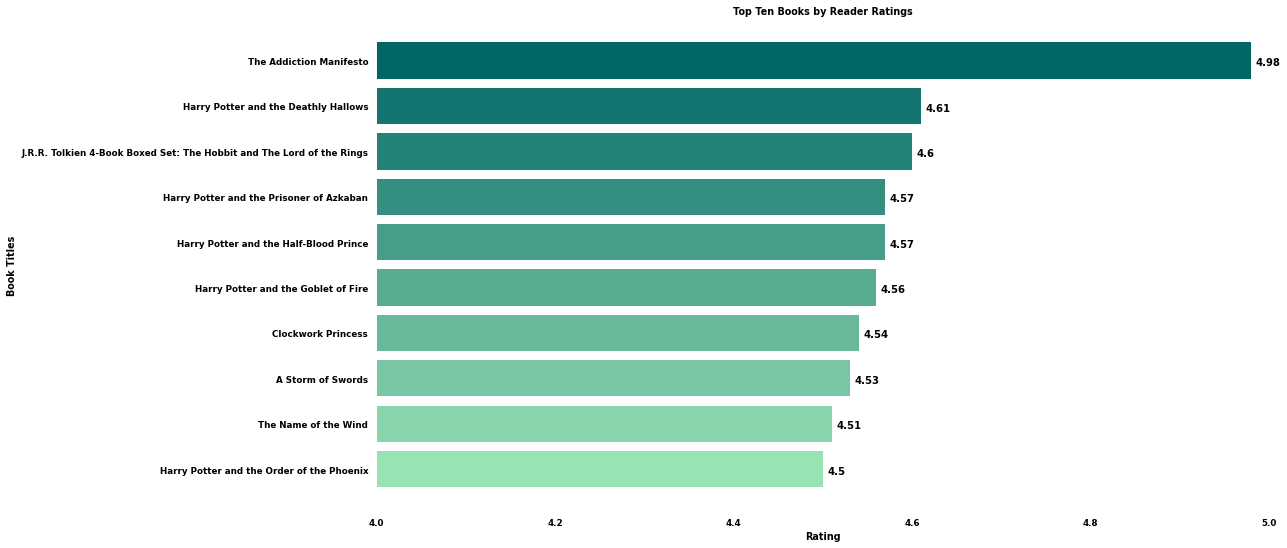

In [13]:
# Matplotlib
df = book_df.sort_values('Rating', ascending=False).head(10)
rating = df['Rating']
title = df['Title']
fig, ax = plt.subplots(figsize=(16, 9))
col = ['#036666','#14746F','#248277','#358F80','#469D89','#56AB91', '#67B99A','#78C6A3','#88D4AB','#99E2B4']

ax.barh(title,rating, color=col)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.005, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')

plt.xlabel("Rating", fontweight='bold')
plt.ylabel("Book Titles",fontweight='bold')
plt.title("Top Ten Books by Reader Ratings", fontweight='bold')
plt.xlim(4,5)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')

plt.show()

#### Are the Number of Reviews and the Average Rating of books related?

<Figure size 1080x720 with 0 Axes>

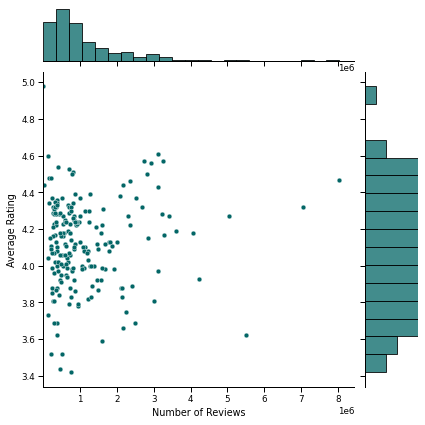

In [12]:
# Seaborn

#Checking for any relation between them.
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(y="Rating",x='Number of Reviews', kind='scatter',  
                  data= book_df[['Number of Reviews', 'Rating']],color='#036666')
ax.set_axis_labels("Number of Reviews", "Average Rating")
ax.ax_marg_x.set_xlim(0.5)
plt.xlim(0,5)
plt.show()


Above we have a jointplot, this plot depicts how the avergage rating of a book varies with the number of reviews a book has. The marginal plots depict the distribution of each variable, i.e. Avergage Rating and the Number of Reviews of books in the dataset. We can see by lookking at the marginal plots that the variable 'Number of Reviews' is heavily skewed to the right whereas 'Average Rating' appears to be normally distibuted with a possibility of one outlier. The main plot shows us that there is not much of a association between the variables since the points seem to be clustered along the y-axis. Thus there is no realtion between the Average Rating of a book and the Number of Reviews it has.

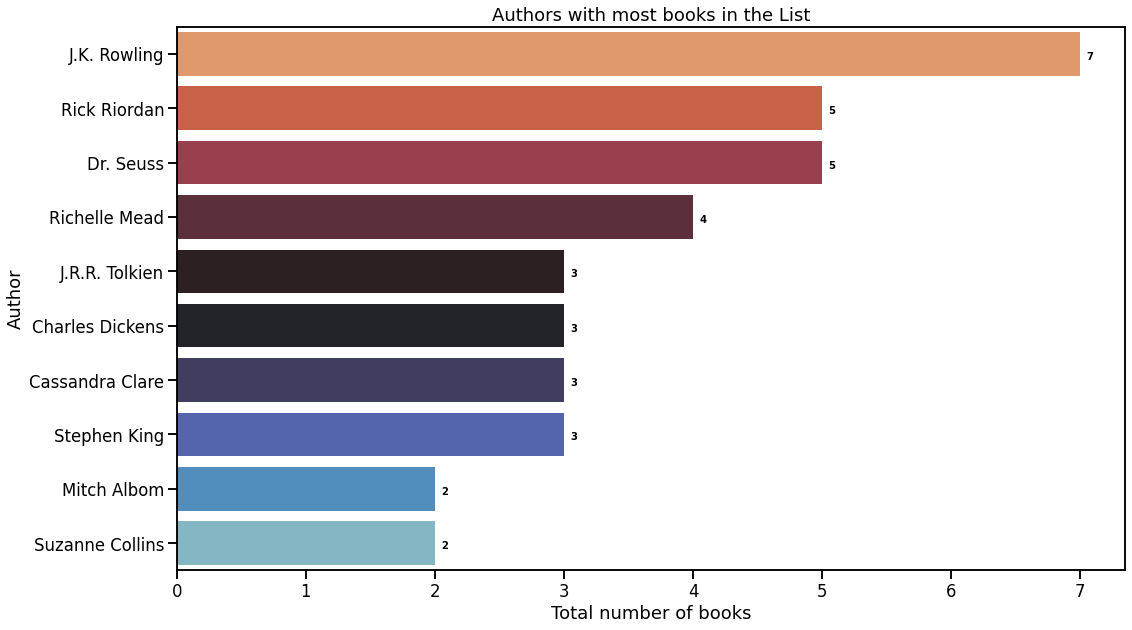

In [323]:
# Which are the authors with most books on the bestsellers list

sns.set_context('talk')
most_books = book_df.groupby('Author')['Title'].count().reset_index().sort_values('Title', ascending=False).head(10).set_index('Author')
plt.figure(figsize=(17,10))
ax = sns.barplot(most_books['Title'], 
                 most_books.index, 
                 palette='icefire_r')

ax.set_title("Authors with most books in the List")
ax.set_xlabel("Total number of books")

for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+0.5, 
            str(round(i.get_width())), fontsize = 10,
            color = 'k',fontweight='bold')



### Statistical Analysis
One-Sample T-Test: 

Assumptions:

We are assuming that our population is normally distributed, since the distribution of Ratings from the joint plot above was fairly normal and the sample size = 200 which is greater than 30, thus the Central Limit Theorem applies. 

(i) &nbsp;  H<sub>o</sub>: $\mu$ = 4 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;         H<sub>a</sub>: $\mu$ $\ne$ 4

The null hypothesis H<sub>o</sub> states that the estimated population parameter of the average rating of books in the list on Goodreads is 4.

The alternative hypothesis H<sub>a</sub> states that the population parameter does not equal the null hypothesis value, which is that the mean rating of books on the Goodreads List differs from 4

(ii) Find the test statistic:

t<sub>obs</sub> = $\frac{(\bar{x} - \mu)} {( \frac{s_x}{√n} )}$


Since the population variance is unknown the appropriate hypothesis test for this case is the T test.

 


In [337]:
xbar = book_df['Rating'].mean()
s = book_df['Rating'].std()
n = book_df['Rating'].count()

# test statistic T
tob = (xbar - 4)/(s/(n**(1/2)))
tob

7.065694825790994

In [338]:
# T critical value
scipy.stats.t.ppf(q=1-.05/2,df=n-1)

1.971956544249395

AttributeError: 'numpy.float64' object has no attribute 'cdf'

In [ ]:
2 × (1 – tcdf(-1099,1.8529,49)) = 0.0699